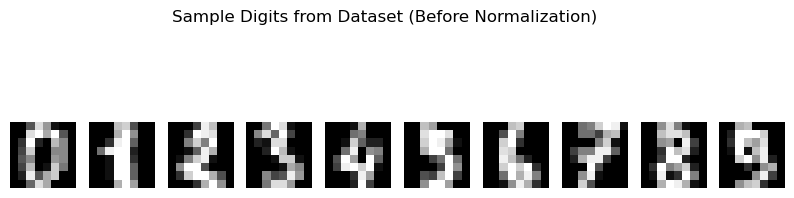

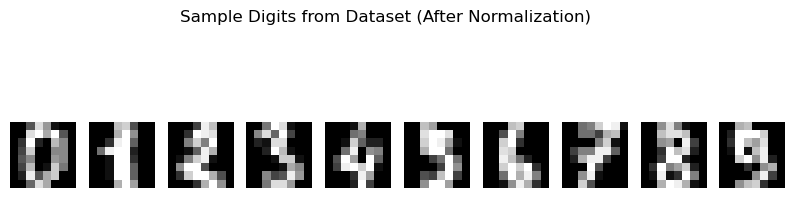

In [22]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# Load digits dataset
digits = load_digits()

# Show samples of the digits before normalization
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.suptitle('Sample Digits from Dataset (Before Normalization)')
plt.show()

# Normalize the pixel values of the digits
normalized_digits = (digits.data - np.min(digits.data)) / (np.max(digits.data) - np.min(digits.data))

# Reshape the normalized digits back to images
normalized_images = normalized_digits.reshape(-1, 8, 8)

# Show samples of the digits after normalization
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(normalized_images[i], cmap='gray')
    ax.axis('off')
plt.suptitle('Sample Digits from Dataset (After Normalization)')
plt.show()


In [32]:
from scipy.ndimage import rotate, shift
from sklearn.datasets import load_digits
import numpy as np

# Load the digits dataset and normalize it
digits = load_digits()
normalized_digits = (digits.data - np.min(digits.data)) / (np.max(digits.data) - np.min(digits.data))

def augment_data_normalized(images, labels):
    augmented_images = []
    augmented_labels = []
    for i, image in enumerate(images):
        # Original shape for reshaping
        original_shape = (8, 8)  # Digits images are 8x8
        
        # Reshape to 2D
        image_2d = image.reshape(original_shape)
        
        # Rotate
        rotated_image = rotate(image_2d, angle=15, reshape=False)
        augmented_images.append(rotated_image.flatten())
        augmented_labels.append(labels[i])
        
        # Flip horizontally
        flipped_image = np.fliplr(image_2d)
        augmented_images.append(flipped_image.flatten())
        augmented_labels.append(labels[i])
        
        # Shift
        shifted_image = shift(image_2d, shift=(5, 5), mode='nearest')
        augmented_images.append(shifted_image.flatten())
        augmented_labels.append(labels[i])
        
        # Add random noise
        noisy_image = np.clip(image_2d + np.random.normal(loc=0.0, scale=0.1, size=original_shape), 0, 1)
        augmented_images.append(noisy_image.flatten())
        augmented_labels.append(labels[i])
        
    return np.array(augmented_images), np.array(augmented_labels)

# Augment the normalized data
augmented_images, augmented_labels = augment_data_normalized(normalized_digits, digits.target)

# Note: The augmented data is already flattened and normalized


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=4000, random_state=42)
log_reg.fit(X_train, y_train)

# Train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Predict and evaluate KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"KNN Accuracy: {accuracy_knn}")


Logistic Regression Accuracy: 0.7830319888734353
KNN Accuracy: 0.8456189151599444


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=4000, random_state=42)
log_reg.fit(X_train, y_train)

# Train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Train XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Train CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train, verbose=False)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Predict and evaluate KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Predict and evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Predict and evaluate CatBoost
y_pred_catboost = catboost_model.predict(X_test)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"CatBoost Accuracy: {accuracy_catboost}")


Logistic Regression Accuracy: 0.7830319888734353
KNN Accuracy: 0.8456189151599444
XGBoost Accuracy: 0.8643949930458971
CatBoost Accuracy: 0.8630041724617524


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train Logistic Regression without regularization
log_reg = LogisticRegression(max_iter=4000, random_state=42)
log_reg.fit(X_train_normalized, y_train)

# Train Logistic Regression with L2 regularization (Ridge)
log_reg_reg = LogisticRegression(C=1.5, penalty='l2', max_iter=4000, random_state=42)
log_reg_reg.fit(X_train_normalized, y_train)

# Predict and evaluate Logistic Regression without regularization
y_pred_log_reg = log_reg.predict(X_test_normalized)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Predict and evaluate Logistic Regression with L2 regularization
y_pred_log_reg_reg = log_reg_reg.predict(X_test_normalized)
accuracy_log_reg_reg = accuracy_score(y_test, y_pred_log_reg_reg)

print(f"Logistic Regression Accuracy (No Regularization): {accuracy_log_reg}")
print(f"Logistic Regression Accuracy (L2 Regularization): {accuracy_log_reg_reg}")


Logistic Regression Accuracy (No Regularization): 0.7816411682892906
Logistic Regression Accuracy (L2 Regularization): 0.7851182197496523
